In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
def plot(X, y, idx):
    plt.figure(figsize=(15,2))
    plt.imshow(X[idx])
    plt.xlabel(y[idx])

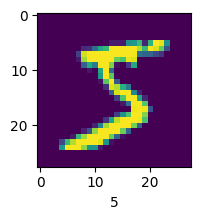

In [11]:
plot(X_train, y_train, 0)

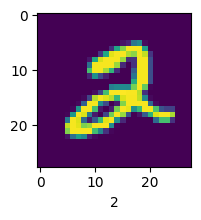

In [12]:
plot(X_train, y_train, 5)

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu', input_shape = (28,28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam', 
            loss = 'sparse_categorical_crossentropy', 
            metrics = ['accuracy'])

cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5


c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7309 - loss: 2.5856
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9488 - loss: 0.1979
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9685 - loss: 0.1077
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9767 - loss: 0.0795
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9812 - loss: 0.0622


In [17]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9686 - loss: 0.1307


[0.10368523001670837, 0.9731000065803528]

In [18]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [19]:
y_pred = [np.argmax(i) for i in y_pred]

In [20]:
y_pred[0]

7

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.93      0.99      0.96      1135
           2       0.96      0.92      0.94      1032
           3       0.98      0.97      0.98      1010
           4       0.96      0.98      0.97       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.93      0.95      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [22]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

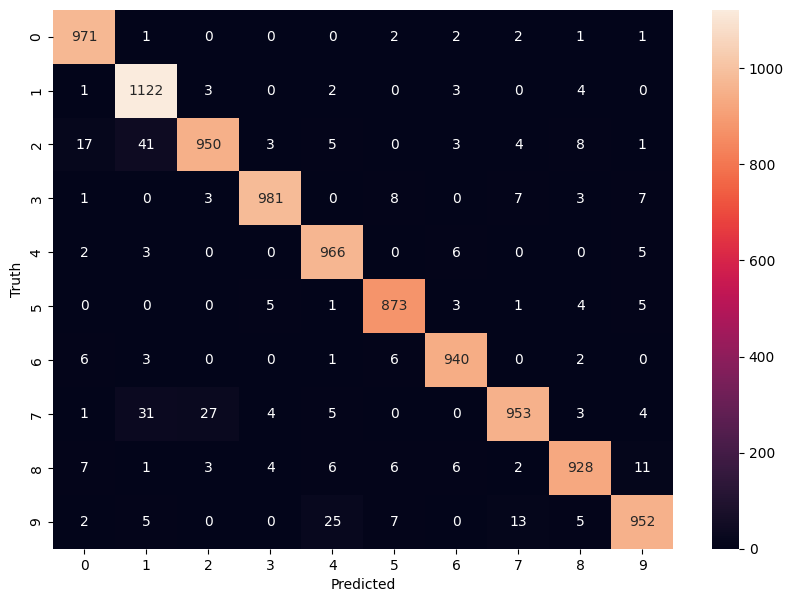

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Changing no. of filters, layers might even increase the accuracy